Train the three different transfer learning models (Train-XXXX.ipynb):
Select 2 additional models from Keras Built-in Vision Models.
Create a new notebook for the each model.
Implement and train the model.
Make sure you look make the learning curves.
Save the model using model.save (see Keras Model Saving
Copy the notebook and try a different base model.
Compare the three models:

Here, we are using the Transfer Learning  model Xception.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
archive_path = '/content/drive/MyDrive/archive'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


In [4]:
train_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'
validation_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/valid'
test_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/test'


In [5]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 6  # Update with the correct number of classes in your dataset

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.
83683744/83683744 [==============================] - 1s 0us/step


In [6]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20
29/29 [==============================] - 271s 9s/step - loss: 0.9244 - accuracy: 0.6678 - val_loss: 0.9111 - val_accuracy: 0.7179
Epoch 2/20
29/29 [==============================] - 242s 8s/step - loss: 0.4462 - accuracy: 0.8500 - val_loss: 0.9427 - val_accuracy: 0.6410
Epoch 3/20
29/29 [==============================] - 238s 8s/step - loss: 0.3211 - accuracy: 0.8944 - val_loss: 0.7681 - val_accuracy: 0.7179
Epoch 4/20
29/29 [==============================] - 265s 9s/step - loss: 0.2645 - accuracy: 0.9178 - val_loss: 0.8537 - val_accuracy: 0.7436
Epoch 5/20
29/29 [==============================] - 241s 8s/step - loss: 0.2111 - accuracy: 0.9344 - val_loss: 0.8729 - val_accuracy: 0.7179
Epoch 6/20
29/29 [==============================] - 241s 8s/step - loss: 0.1585 - accuracy: 0.9500 - val_loss: 0.8924 - val_accuracy: 0.8205
Epoch 7/20
29/29 [==============================] - 235s 8s/step - loss: 0.1603 - accuracy: 0.9478 - val_loss: 1.1159 - val_accuracy: 0.7179
Epoch 8/20
29

In [7]:
# Define the file path where you want to save the model
model_path = "Train-1.ipynb.h5"

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: Train-1.ipynb.h5


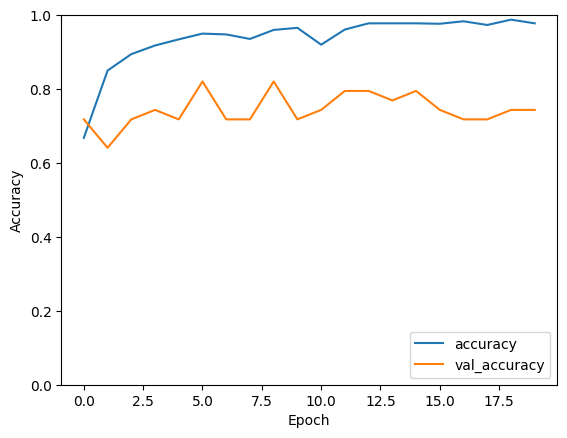

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Comments:

The training accuracy reaching and staying at 1 (100%) indicates that the model is able to perfectly predict the training data.The fact that validation accuracy is lower than training accuracy is expected, as the model may not perform as well on unseen data as it does on the data it was trained on.The fluctuation of validation accuracy between 0.6 and 0.8 suggests that the model's performance on unseen validation data is inconsistent. This could be due to the model's inability to generalize well to new data, which is a common symptom of overfitting.